<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notary-Register-for-RealEstate-Transactions" data-toc-modified-id="Notary-Register-for-RealEstate-Transactions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notary Register for RealEstate Transactions</a></span></li><li><span><a href="#Import-JSON-file-from-the-API" data-toc-modified-id="Import-JSON-file-from-the-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import JSON file from the API</a></span></li><li><span><a href="#Original-DataBase-analysis" data-toc-modified-id="Original-DataBase-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Original DataBase analysis</a></span></li><li><span><a href="#Cleaning-columns" data-toc-modified-id="Cleaning-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning columns</a></span></li><li><span><a href="#Checking-the-values-for-the-column-'type_local'" data-toc-modified-id="Checking-the-values-for-the-column-'type_local'-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checking the values for the column 'type_local'</a></span></li><li><span><a href="#Saving-Expropriation-DB-for-future-comparaison" data-toc-modified-id="Saving-Expropriation-DB-for-future-comparaison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving Expropriation DB for future comparaison</a></span></li><li><span><a href="#Removing-not-required-or-usable-Rows" data-toc-modified-id="Removing-not-required-or-usable-Rows-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Removing not required or usable Rows</a></span></li><li><span><a href="#Creating-tables-from-the-database" data-toc-modified-id="Creating-tables-from-the-database-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Creating tables from the database</a></span></li><li><span><a href="#Export" data-toc-modified-id="Export-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export</a></span></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Hypothesis Testing</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

# Notary Register for RealEstate Transactions

In [1]:
from IPython.display import Image

In [2]:
Image(url='http://www.casagrande-labrousse-notaires.com/wp-content/uploads/2016/11/notaire-paris-rue-lincoln-zoom.png')

In [3]:
Image(url='https://de.academic.ru/pictures/dewiki/80/Paris_9th.png')

In [4]:
import pandas as pd
import numpy as np
import json
from string import ascii_uppercase
import itertools
import requests as r
from scipy import stats

# Import JSON file from the API

In [5]:
# function to genere URL for all (fr AA to BF) for the commune 75109 - Paris 9e
lst=[]
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_uppercase, repeat=size):
            yield "".join(s)
for s in iter_all_strings():
    if len(s)<2:
        pass
    else:
        lst.append(s)
    if s == 'BF':
        break
print(lst)

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF']


In [6]:
# loop to import all section (fr AA to BF) from the commune 75109 - Paris 9e
lst_df=[]
for i in lst:
    data=r.get(f'https://app.dvf.etalab.gouv.fr/api/mutations3/75109/000{i}')
    data=data.json()
    df = pd.DataFrame(data['mutations'])
    lst_df.append(df) 
db=pd.concat(lst_df, axis=0, ignore_index=True)

In [7]:
#checking all data info/types, we can see if we use the API to get automatically all the reuqired data.
#we will have some work to update the columns data types to be able to perform analysis. 
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13938 entries, 0 to 13937
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_mutation                   13938 non-null  object
 1   date_mutation                 13938 non-null  object
 2   numero_disposition            13938 non-null  object
 3   nature_mutation               13938 non-null  object
 4   valeur_fonciere               13938 non-null  object
 5   adresse_numero                13938 non-null  object
 6   adresse_suffixe               13938 non-null  object
 7   adresse_nom_voie              13938 non-null  object
 8   adresse_code_voie             13938 non-null  object
 9   code_postal                   13938 non-null  object
 10  code_commune                  13938 non-null  object
 11  nom_commune                   13938 non-null  object
 12  code_departement              13938 non-null  object
 13  ancien_code_comm

# Original DataBase analysis

In [8]:
#checking unique values for columns with data not clear for us

In [9]:
db['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé',
       'Dépendance', 'Maison', 'None'], dtype=object)

In [10]:
db['numero_disposition'].unique()
# can be remove

array(['1', '2', '13', '14', '15', '16', '17', '18', '23', '4', '3', '19',
       '20', '21', '22', '24', '5'], dtype=object)

In [11]:
db['code_type_local'].unique()
# can be remove

array(['2', '4', '3', '1', 'None'], dtype=object)

In [12]:
db['code_nature_culture'].unique()
# can be remove

array(['None', 'S', 'AG'], dtype=object)

In [13]:
db['nature_culture'].unique()
# can be remove

array(['None', 'sols', "terrains d'agrément"], dtype=object)

In [14]:
db['code_nature_culture_speciale'].unique()
# can be remove

array(['None'], dtype=object)

In [15]:
db['nature_culture_speciale'].unique()
# can be remove

array(['None'], dtype=object)

In [16]:
# checking all rows where the 'type_local' is none. 
# Meaning not defined as 'Appartement', 'Local industriel. commercial ou assimilé','Dépendance', 'Maison'
db.loc[db['type_local'] == 'None']

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
591,2014-1061534,2014-07-15,1,Vente,6000.0,12,None,RUE DE CALAIS,1434,75009,...,nan,nan,S,sols,None,None,264.0,2.331055,48.882679,000AA
640,2019-1072261,2019-11-15,1,Vente en l'état futur d'achèvement,45000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
686,2019-1071056,2019-07-12,1,Vente en l'état futur d'achèvement,65000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
708,2019-1070255,2019-05-13,1,Vente en l'état futur d'achèvement,37000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
709,2019-1070127,2019-05-03,1,Vente en l'état futur d'achèvement,1800000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824,2017-1408700,2017-06-30,2,Vente,7035000.0,nan,None,None,None,None,...,nan,nan,None,None,None,None,nan,2.338943,48.874948,000AY
8894,2016-1240081,2016-04-07,1,Vente,2945000.0,nan,None,None,None,None,...,nan,nan,None,None,None,None,nan,2.34329,48.875568,000AY
10899,2019-1068960,2019-01-23,1,Vente en l'état futur d'achèvement,148977600.0,39,None,AV TRUDAINE,9484,75009,...,nan,nan,None,None,None,None,nan,2.342295,48.880777,000BB
10910,2018-1375831,2018-12-13,1,Vente,5598626.0,1,None,RUE BOCHART DE SARON,1046,75009,...,nan,nan,None,None,None,None,nan,2.342295,48.880777,000BB


In [17]:
# checking 'nature_mutation' for all ['type_local'] == 'None'
chk1 = db.loc[db['type_local'] == 'None']
chk1['nature_mutation'].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Expropriation',
       'Echange'], dtype=object)

In [18]:
# checking expropriation is that bucket
db.loc[(db['type_local'] == 'None') & (db['nature_mutation'] == 'Expropriation')]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1250,2014-1063066,2014-05-13,13,Expropriation,37272.0,74.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327401,48.880914,000AB
1251,2014-1063067,2014-05-13,14,Expropriation,61064.0,72.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327398,48.880848,000AB
1252,2014-1063068,2014-05-13,15,Expropriation,166758.0,70.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327532,48.880619,000AB
1253,2014-1063069,2014-05-13,16,Expropriation,176698.0,66.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327518,48.880197,000AB
1254,2014-1063070,2014-05-13,17,Expropriation,84469.0,60.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.32734,48.879891,000AB
1255,2014-1063071,2014-05-13,18,Expropriation,203125.0,16.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327489,48.879966,000AB
1256,2014-1063076,2014-05-13,23,Expropriation,7678.0,76.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327416,48.881063,000AB
5005,2014-1063072,2014-05-13,19,Expropriation,58233.0,15.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327569,48.879393,000AJ
5006,2014-1063073,2014-05-13,20,Expropriation,173460.0,17.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327299,48.87941,000AJ
5007,2014-1063074,2014-05-13,21,Expropriation,8747.0,54.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327215,48.87934,000AJ


In [19]:
# checking expropriation is the entire db to compare
db.loc[db['nature_mutation'] == 'Expropriation']

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1250,2014-1063066,2014-05-13,13,Expropriation,37272.0,74.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327401,48.880914,000AB
1251,2014-1063067,2014-05-13,14,Expropriation,61064.0,72.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327398,48.880848,000AB
1252,2014-1063068,2014-05-13,15,Expropriation,166758.0,70.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327532,48.880619,000AB
1253,2014-1063069,2014-05-13,16,Expropriation,176698.0,66.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327518,48.880197,000AB
1254,2014-1063070,2014-05-13,17,Expropriation,84469.0,60.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.32734,48.879891,000AB
1255,2014-1063071,2014-05-13,18,Expropriation,203125.0,16.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327489,48.879966,000AB
1256,2014-1063076,2014-05-13,23,Expropriation,7678.0,76.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327416,48.881063,000AB
5005,2014-1063072,2014-05-13,19,Expropriation,58233.0,15.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327569,48.879393,000AJ
5006,2014-1063073,2014-05-13,20,Expropriation,173460.0,17.0,None,RUE DE LIEGE,5665,75009,...,nan,nan,None,None,None,None,nan,2.327299,48.87941,000AJ
5007,2014-1063074,2014-05-13,21,Expropriation,8747.0,54.0,None,RUE D AMSTERDAM,0300,75009,...,nan,nan,None,None,None,None,nan,2.327215,48.87934,000AJ


In [20]:
# we can see here 200 transactions are VEFA, meaning NEW FLATS
db.loc[db['nature_mutation'] == 'Vente en l\'état futur d\'achèvement']

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
640,2019-1072261,2019-11-15,1,Vente en l'état futur d'achèvement,45000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
686,2019-1071056,2019-07-12,1,Vente en l'état futur d'achèvement,65000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
708,2019-1070255,2019-05-13,1,Vente en l'état futur d'achèvement,37000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
709,2019-1070127,2019-05-03,1,Vente en l'état futur d'achèvement,1800000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
710,2019-1070127,2019-05-03,1,Vente en l'état futur d'achèvement,1800000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,2017-1410320,2017-11-16,2,Vente en l'état futur d'achèvement,17593000.0,7,None,RUE BERGERE,0888,75009,...,73.0,0.0,None,None,None,None,nan,2.346854,48.871892,000AV
7446,2017-1410320,2017-11-16,2,Vente en l'état futur d'achèvement,17593000.0,7,None,RUE BERGERE,0888,75009,...,13.0,0.0,None,None,None,None,nan,2.346854,48.871892,000AV
7447,2017-1410320,2017-11-16,2,Vente en l'état futur d'achèvement,17593000.0,7,None,RUE BERGERE,0888,75009,...,13.0,0.0,None,None,None,None,nan,2.346854,48.871892,000AV
7448,2017-1410320,2017-11-16,2,Vente en l'état futur d'achèvement,17593000.0,7,None,RUE BERGERE,0888,75009,...,11.0,0.0,None,None,None,None,nan,2.346854,48.871892,000AV


In [21]:
chk2 = db.loc[db['nature_mutation'] == 'Vente en l\'état futur d\'achèvement']
chk2['type_local'].unique()

array(['None', 'Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [22]:
# checking number of transaction VEFA without any label for ['type_local']
db.loc[(db['nature_mutation'] == 'Vente en l\'état futur d\'achèvement') & (db['type_local'] == 'None' )].sample(5)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
984,2017-1409281,2017-08-22,1,Vente en l'état futur d'achèvement,471000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
913,2017-1409979,2017-10-11,1,Vente en l'état futur d'achèvement,349000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
896,2017-1410324,2017-11-30,1,Vente en l'état futur d'achèvement,60000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
931,2017-1409718,2017-09-25,1,Vente en l'état futur d'achèvement,338000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
920,2017-1409880,2017-10-06,1,Vente en l'état futur d'achèvement,589000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB


In [23]:
#checking different operations
chk3 = db.loc[(db['nature_mutation'] == 'Vente en l\'état futur d\'achèvement') & (db['type_local'] == 'None' )]
chk3['longitude'].unique()

array(['2.329696', '2.342295'], dtype=object)

In [24]:
#checking different operations
chk3 = db.loc[(db['nature_mutation'] == 'Vente en l\'état futur d\'achèvement') & (db['type_local'] == 'None' )]
chk3['latitude'].unique()

array(['48.880336', '48.880777'], dtype=object)

In [25]:
#with that check we can see the VEFA transactions come from 2 new operation in the area

In [26]:
chk3[['lot1_surface_carrez',
      'lot2_surface_carrez',
      'lot3_surface_carrez',
      'lot4_surface_carrez',
      'lot5_surface_carrez',
      'surface_reelle_bati',
      'nombre_pieces_principales',
      'surface_terrain']]

,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_surface_carrez,surface_reelle_bati,nombre_pieces_principales,surface_terrain
640,nan,nan,nan,nan,nan,nan,nan,nan
686,nan,nan,nan,nan,nan,nan,nan,nan
708,nan,nan,nan,nan,nan,nan,nan,nan
709,nan,nan,nan,nan,nan,nan,nan,nan
710,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
1038,38.65,nan,nan,nan,nan,nan,nan,nan
1040,30.44,nan,nan,nan,nan,nan,nan,nan
1041,23.51,nan,nan,nan,nan,nan,nan,nan
1042,nan,nan,nan,nan,nan,nan,nan,nan


In [27]:
#with that check we can see only surface are given into 'lot1_surface_carrez'
#let's apply that logic below (keeping only flats where we have surface and price for none)
chk3[['lot1_surface_carrez',
      'lot2_surface_carrez',
      'lot3_surface_carrez',
      'lot4_surface_carrez',
      'lot5_surface_carrez',
      'surface_reelle_bati',
      'nombre_pieces_principales',
      'surface_terrain']].describe()

,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_surface_carrez,surface_reelle_bati,nombre_pieces_principales,surface_terrain
count,108,108,108,108,108,108,108,108
unique,12,1,1,1,1,1,1,1
top,nan,nan,nan,nan,nan,nan,nan,nan
freq,95,108,108,108,108,108,108,108


In [28]:
chk3.loc[(db['lot1_surface_carrez'] != 'nan')]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
995,2017-1409156,2017-07-26,1,Vente en l'état futur d'achèvement,1198000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
996,2017-1409128,2017-07-24,1,Vente en l'état futur d'achèvement,377000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
998,2017-1409093,2017-07-19,1,Vente en l'état futur d'achèvement,560000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1001,2017-1409063,2017-07-18,1,Vente en l'état futur d'achèvement,2323000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1002,2017-1409064,2017-07-17,1,Vente en l'état futur d'achèvement,343000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1004,2017-1409030,2017-07-12,1,Vente en l'état futur d'achèvement,866000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1013,2017-1408928,2017-07-06,1,Vente en l'état futur d'achèvement,283000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1023,2017-1408617,2017-06-21,1,Vente en l'état futur d'achèvement,473000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1029,2017-1408154,2017-05-09,1,Vente en l'état futur d'achèvement,390000.0,50.0,None,RUE DE CLICHY,2116,75009,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB
1034,2017-1407963,2017-04-21,1,Vente en l'état futur d'achèvement,916000.0,nan,None,None,None,None,...,nan,nan,None,None,None,None,nan,2.329696,48.880336,000AB


In [29]:
#Correlation bwt surface VS price for VEFA flats
chk4 = chk3[['valeur_fonciere','lot1_surface_carrez']]
chk4['valeur_fonciere'] = np.float64(chk4['valeur_fonciere'])
chk4['lot1_surface_carrez'] = np.float64(chk4['lot1_surface_carrez'])
chk4.corr()

<ipython-input-29-3354cf9500c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chk4['valeur_fonciere'] = np.float64(chk4['valeur_fonciere'])
<ipython-input-29-3354cf9500c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chk4['lot1_surface_carrez'] = np.float64(chk4['lot1_surface_carrez'])


,valeur_fonciere,lot1_surface_carrez
valeur_fonciere,1.000000,0.992889
lot1_surface_carrez,0.992889,1.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

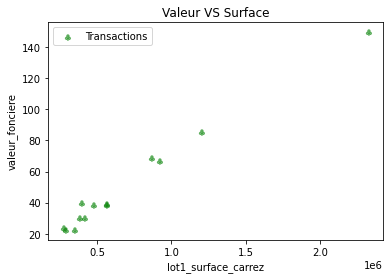

In [31]:
x = chk4['valeur_fonciere']
y = chk4['lot1_surface_carrez']

plt.scatter(x,y,c="g", alpha=0.5, marker=r'$\clubsuit$', label='Transactions')

plt.legend()
plt.title('Valeur VS Surface')

plt.xlabel('lot1_surface_carrez')
plt.ylabel('valeur_fonciere')

plt.show() #to stop changes 

# Cleaning columns

In [32]:
# to convert nan & None to 0
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('nan', 0)
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('None', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('nan', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('None', 0)

# cleaning columns column 'surface_terrain'
db['surface_terrain']=db['surface_terrain'].replace('nan', 0)
db['surface_terrain']=db['surface_terrain'].replace('None', 0)

# to convert required columns to float64
db['lot1_surface_carrez'] = np.float64(db['lot1_surface_carrez'])
db['lot2_surface_carrez'] = np.float64(db['lot2_surface_carrez'])
db['lot3_surface_carrez'] = np.float64(db['lot3_surface_carrez'])
db['lot4_surface_carrez'] = np.float64(db['lot4_surface_carrez'])
db['lot5_surface_carrez'] = np.float64(db['lot5_surface_carrez'])
db['surface_reelle_bati'] = np.float64(db['surface_reelle_bati'])
db['valeur_fonciere'] = np.float64(db['valeur_fonciere'])
db['surface_terrain'] = np.float64(db['surface_terrain'])
db['longitude'] = np.float64(db['longitude'])
db['latitude'] = np.float64(db['latitude'])

# simplification of the parcelle number (we might need to remove that line based on other linked data)
# possible key value
db['id_parcelle']=db['id_parcelle'].str[-4:]

# cleaning columns 'nombre_pieces_principales'
db['nombre_pieces_principales'].unique()
db['nombre_pieces_principales']=db['nombre_pieces_principales'].replace('nan', 0)
db['nombre_pieces_principales']=db['nombre_pieces_principales'].astype(np.float64)
db['nombre_pieces_principales']=db['nombre_pieces_principales'].astype(np.int64)

# adding new colum for the sum & compare to 'surface_reelle_bati'
db['surface_carrez_total']=db['lot1_surface_carrez']+db['lot2_surface_carrez']+db['lot3_surface_carrez']+db['lot4_surface_carrez']+db['lot5_surface_carrez']

In [33]:
columns_d = ['numero_disposition',
         'code_departement',
         'ancien_code_commune',
         'ancien_nom_commune',
         'ancien_id_parcelle',
         'numero_volume',
         'lot1_numero',
         'lot1_surface_carrez',
         'lot2_numero',
         'lot2_surface_carrez',
         'lot3_numero',
         'lot3_surface_carrez',
         'lot4_numero',
         'lot4_surface_carrez',
         'lot5_numero',
         'lot5_surface_carrez',
         'nombre_lots',
         'code_type_local',
         'code_nature_culture',
         'nature_culture',
         'code_nature_culture_speciale',
         'nature_culture_speciale']

db=db.drop(columns=columns_d)
db

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,surface_carrez_total
0,2019-1072649,2019-12-23,Vente,665000.0,47,None,RUE DE DOUAI,2909,75009,75109,Paris 9e Arrondissement,0044,Appartement,55.0,4,0.0,2.330953,48.882913,000AA,57.40
1,2019-1072739,2019-12-19,Vente,18300000.0,106,None,RUE D AMSTERDAM,0300,75009,75109,Paris 9e Arrondissement,0119,Local industriel. commercial ou assimilé,693.0,0,0.0,2.327339,48.883026,000AA,0.00
2,2019-1072673,2019-12-16,Vente,71000.0,14,None,RUE BALLU,0646,75009,75109,Paris 9e Arrondissement,0065,Dépendance,0.0,0,0.0,2.330517,48.882159,000AA,0.00
3,2019-1072512,2019-12-13,Vente,1520000.0,1,None,PL ADOLPHE MAX,0065,75009,75109,Paris 9e Arrondissement,0040,Appartement,123.0,5,0.0,2.330485,48.883136,000AA,125.75
4,2019-1072512,2019-12-13,Vente,1520000.0,1,None,PL ADOLPHE MAX,0065,75009,75109,Paris 9e Arrondissement,0040,Appartement,6.0,1,0.0,2.330485,48.883136,000AA,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,2014-1059819,2014-01-13,Vente,252000.0,10,None,RUE DE ROCHECHOUART,8289,75009,75109,Paris 9e Arrondissement,0067,Appartement,25.0,1,0.0,2.345008,48.877038,000BF,0.00
13934,2014-1059714,2014-01-10,Vente,540000.0,10,None,RUE MAYRAN,6223,75009,75109,Paris 9e Arrondissement,0009,Appartement,60.0,3,0.0,2.344981,48.877407,000BF,59.75
13935,2014-1059717,2014-01-10,Vente,102000.0,4,None,RUE ROCHAMBEAU,8283,75009,75109,Paris 9e Arrondissement,0024,Dépendance,0.0,0,0.0,2.346670,48.877538,000BF,0.00
13936,2014-1059717,2014-01-10,Vente,102000.0,4,None,RUE ROCHAMBEAU,8283,75009,75109,Paris 9e Arrondissement,0024,Dépendance,0.0,0,0.0,2.346670,48.877538,000BF,0.00


In [34]:
db.dtypes

id_mutation                   object
date_mutation                 object
nature_mutation               object
valeur_fonciere              float64
adresse_numero                object
adresse_suffixe               object
adresse_nom_voie              object
adresse_code_voie             object
code_postal                   object
code_commune                  object
nom_commune                   object
id_parcelle                   object
type_local                    object
surface_reelle_bati          float64
nombre_pieces_principales      int64
surface_terrain              float64
longitude                    float64
latitude                     float64
section_prefixe               object
surface_carrez_total         float64
dtype: object

In [35]:
#comparing surface relle & surface Carrez total
db[['nature_mutation','valeur_fonciere','surface_reelle_bati','surface_carrez_total','type_local']].sample(10)

,nature_mutation,valeur_fonciere,surface_reelle_bati,surface_carrez_total,type_local
9492,Vente,115000.0,12.0,11.78,Appartement
3919,Vente,35000.0,0.0,0.00,Dépendance
3769,Vente,336300.0,94.0,26.66,Appartement
6619,Vente,885000.0,20.0,23.88,Appartement
1085,Vente,1390000.0,0.0,0.00,Dépendance
11223,Adjudication,605000.0,76.0,0.00,Appartement
10201,Vente,850000.0,69.0,96.82,Appartement
5294,Vente,850000.0,0.0,0.00,Dépendance
9526,Vente,335000.0,362.0,0.00,Local industriel. commercial ou assimilé
8398,Vente,944500.0,11.0,0.00,Local industriel. commercial ou assimilé


In [36]:
#ordering columns for better visibility
db=db[['id_mutation',
       'date_mutation', 
       'nature_mutation',
       'type_local',
       'nombre_pieces_principales',
       'valeur_fonciere',
       'surface_carrez_total',
       'surface_reelle_bati',
       'surface_terrain',
       'adresse_numero', 
       'adresse_suffixe', 
       'adresse_nom_voie', 
       'code_postal', 
       'nom_commune',
       'adresse_code_voie',
       'code_commune',
       'section_prefixe',
       'id_parcelle',  
       'longitude', 
       'latitude']]
db

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
0,2019-1072649,2019-12-23,Vente,Appartement,4,665000.0,57.40,55.0,0.0,47,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0044,2.330953,48.882913
1,2019-1072739,2019-12-19,Vente,Local industriel. commercial ou assimilé,0,18300000.0,0.00,693.0,0.0,106,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AA,0119,2.327339,48.883026
2,2019-1072673,2019-12-16,Vente,Dépendance,0,71000.0,0.00,0.0,0.0,14,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0065,2.330517,48.882159
3,2019-1072512,2019-12-13,Vente,Appartement,5,1520000.0,125.75,123.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
4,2019-1072512,2019-12-13,Vente,Appartement,1,1520000.0,5.57,6.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,2014-1059819,2014-01-13,Vente,Appartement,1,252000.0,0.00,25.0,0.0,10,None,RUE DE ROCHECHOUART,75009,Paris 9e Arrondissement,8289,75109,000BF,0067,2.345008,48.877038
13934,2014-1059714,2014-01-10,Vente,Appartement,3,540000.0,59.75,60.0,0.0,10,None,RUE MAYRAN,75009,Paris 9e Arrondissement,6223,75109,000BF,0009,2.344981,48.877407
13935,2014-1059717,2014-01-10,Vente,Dépendance,0,102000.0,0.00,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538
13936,2014-1059717,2014-01-10,Vente,Dépendance,0,102000.0,0.00,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538


# Checking the values for the column 'type_local'

In [37]:
# to understand what is Dépendance and None 
# and if some rows in those categories must be part of the existant surface study for flats

In [38]:
# understand all types
db['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé',
       'Dépendance', 'Maison', 'None'], dtype=object)

In [39]:
# checking values for Maison, that categorie will probably outliers from our study.
db.loc[db['type_local'] == 'Maison']

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
253,2017-1408491,2017-06-28,Vente,Maison,6,2918700.0,0.00,205.0,0.0,20,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0080,2.330153,48.882111
2547,2017-1407077,2017-02-24,Vente,Maison,7,2800000.0,0.00,280.0,139.0,14,None,CITE MALESHERBES,75009,Paris 9e Arrondissement,5952,75109,000AE,0054,2.338854,48.881237
2571,2016-1241239,2016-07-22,Vente,Maison,7,5850000.0,335.62,349.0,0.0,10,None,AV FROCHOT,75009,Paris 9e Arrondissement,3870,75109,000AE,0026,2.338080,48.881874
2615,2015-1151725,2015-03-31,Vente,Maison,2,1660500.0,0.00,76.0,137.0,6,None,AV FROCHOT,75009,Paris 9e Arrondissement,3870,75109,000AE,0084,2.337988,48.881696
2651,2014-1060169,2014-03-12,Vente,Maison,8,320000.0,0.00,268.0,152.0,8,None,CITE MALESHERBES,75009,Paris 9e Arrondissement,5952,75109,000AE,0057,2.339252,48.881163
2957,2016-1241897,2016-09-16,Vente,Maison,4,3400000.0,0.00,189.0,250.0,58,C,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AF,0010,2.336517,48.880336
3410,2016-1240625,2016-05-31,Vente,Maison,8,2309375.0,154.53,181.0,0.0,25,None,RUE DES MARTYRS,75009,Paris 9e Arrondissement,6147,75109,000AG,0028,2.339377,48.878566
10326,2019-1069742,2019-04-12,Vente,Maison,4,3960000.0,0.00,273.0,0.0,38,B,RUE DE LA TOUR D AUVERGNE,75009,Paris 9e Arrondissement,5381,75109,000BA,0144,2.341889,48.879834


In [40]:
# we can see here the ratio €/m² for Maison is quite high.
House = db.loc[db['type_local'] == 'Maison']
print('average price: ',round((House['valeur_fonciere'] / House['surface_reelle_bati']).mean()), '€ / m²')

average price:  13662 € / m²


In [41]:
# check nb of transactions for ['type_local'] == 'Appartement'
db.loc[db['type_local'] == 'Appartement']

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
0,2019-1072649,2019-12-23,Vente,Appartement,4,665000.0,57.40,55.0,0.0,47,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0044,2.330953,48.882913
3,2019-1072512,2019-12-13,Vente,Appartement,5,1520000.0,125.75,123.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
4,2019-1072512,2019-12-13,Vente,Appartement,1,1520000.0,5.57,6.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
7,2019-1072404,2019-12-04,Vente,Appartement,3,602000.0,52.60,54.0,0.0,39,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0048,2.331604,48.882716
10,2019-1072405,2019-12-02,Vente,Appartement,7,608250.0,46.53,150.0,0.0,14,None,RUE DE BRUXELLES,75009,Paris 9e Arrondissement,1345,75109,000AA,0015,2.330999,48.883720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13929,2014-1059868,2014-01-30,Vente,Appartement,4,725527.0,0.00,75.0,0.0,13,None,RUE DE BELLEFOND,75009,Paris 9e Arrondissement,0827,75109,000BF,0037,2.347690,48.877414
13931,2014-1059857,2014-01-29,Vente,Appartement,1,346000.0,0.00,25.0,0.0,10,None,RUE DE ROCHECHOUART,75009,Paris 9e Arrondissement,8289,75109,000BF,0067,2.345008,48.877038
13933,2014-1059819,2014-01-13,Vente,Appartement,1,252000.0,0.00,25.0,0.0,10,None,RUE DE ROCHECHOUART,75009,Paris 9e Arrondissement,8289,75109,000BF,0067,2.345008,48.877038
13934,2014-1059714,2014-01-10,Vente,Appartement,3,540000.0,59.75,60.0,0.0,10,None,RUE MAYRAN,75009,Paris 9e Arrondissement,6223,75109,000BF,0009,2.344981,48.877407


In [42]:
# check nb of transactions for ['type_local'] == 'Dépendance'
db.loc[db['type_local'] == 'Dépendance']

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
2,2019-1072673,2019-12-16,Vente,Dépendance,0,71000.0,0.00,0.0,0.0,14,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0065,2.330517,48.882159
5,2019-1072512,2019-12-13,Vente,Dépendance,0,1520000.0,6.68,0.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
6,2019-1072512,2019-12-13,Vente,Dépendance,0,1520000.0,4.07,0.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
8,2019-1072486,2019-12-04,Vente,Dépendance,0,63000.0,7.00,0.0,0.0,45,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0045,2.331158,48.882895
9,2019-1072379,2019-12-03,Vente,Dépendance,0,25000.0,3.65,0.0,0.0,24,None,RUE DE VINTIMILLE,75009,Paris 9e Arrondissement,9866,75109,000AA,0060,2.329910,48.882595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13920,2014-1060188,2014-02-28,Vente,Dépendance,0,1200000.0,132.22,0.0,0.0,4,None,RUE PIERRE SEMARD,75009,Paris 9e Arrondissement,7479,75109,000BF,0031,2.347352,48.877117
13921,2014-1060188,2014-02-28,Vente,Dépendance,0,1200000.0,132.22,0.0,0.0,4,None,RUE PIERRE SEMARD,75009,Paris 9e Arrondissement,7479,75109,000BF,0031,2.347352,48.877117
13930,2014-1059868,2014-01-30,Vente,Dépendance,0,725527.0,0.00,0.0,0.0,13,None,RUE DE BELLEFOND,75009,Paris 9e Arrondissement,0827,75109,000BF,0037,2.347690,48.877414
13935,2014-1059717,2014-01-10,Vente,Dépendance,0,102000.0,0.00,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538


In [43]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0)]

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
2,2019-1072673,2019-12-16,Vente,Dépendance,0,71000.0,0.0,0.0,0.0,14,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0065,2.330517,48.882159
13,2019-1072226,2019-11-14,Vente,Dépendance,0,1430000.0,0.0,0.0,0.0,14,None,RUE DE BRUXELLES,75009,Paris 9e Arrondissement,1345,75109,000AA,0015,2.330999,48.883720
16,2019-1072104,2019-11-07,Vente,Dépendance,0,60000.0,0.0,0.0,0.0,61,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0131,2.329053,48.883425
18,2019-1071997,2019-10-29,Vente,Dépendance,0,23000.0,0.0,0.0,0.0,24,None,RUE DE VINTIMILLE,75009,Paris 9e Arrondissement,9866,75109,000AA,0060,2.329910,48.882595
23,2019-1071992,2019-10-10,Vente,Dépendance,0,730000.0,0.0,0.0,0.0,100,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AA,0149,2.327471,48.882673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13898,2014-1061540,2014-07-30,Vente,Dépendance,0,75000.0,0.0,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538
13899,2014-1061540,2014-07-30,Vente,Dépendance,0,75000.0,0.0,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538
13930,2014-1059868,2014-01-30,Vente,Dépendance,0,725527.0,0.0,0.0,0.0,13,None,RUE DE BELLEFOND,75009,Paris 9e Arrondissement,0827,75109,000BF,0037,2.347690,48.877414
13935,2014-1059717,2014-01-10,Vente,Dépendance,0,102000.0,0.0,0.0,0.0,4,None,RUE ROCHAMBEAU,75009,Paris 9e Arrondissement,8283,75109,000BF,0024,2.346670,48.877538


In [44]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0) & (db['surface_reelle_bati'] != 0)].head()

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
3969,2016-1240480,2016-06-01,Vente,Dépendance,0,29000.0,0.0,10.0,0.0,6,None,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AH,0028,2.334807,48.877486
4134,2014-1061393,2014-06-30,Vente,Dépendance,0,378000.0,0.0,11.0,0.0,6,None,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AH,0028,2.334807,48.877486
4135,2014-1061393,2014-06-30,Vente,Dépendance,0,378000.0,0.0,11.0,0.0,6,None,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AH,0028,2.334807,48.877486
4136,2014-1061393,2014-06-30,Vente,Dépendance,0,378000.0,0.0,11.0,0.0,6,None,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AH,0028,2.334807,48.877486
4139,2014-1061393,2014-06-30,Vente,Dépendance,0,378000.0,0.0,11.0,0.0,6,None,RUE DE LA ROCHEFOUCAULD,75009,Paris 9e Arrondissement,5356,75109,000AH,0028,2.334807,48.877486


In [45]:
check = db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0) & (db['surface_reelle_bati'] != 0)]
check[['surface_reelle_bati','valeur_fonciere']].mean()

surface_reelle_bati    1.176316e+01
valeur_fonciere        1.626103e+07
dtype: float64

In [46]:
db['surface_terrain']=db['surface_terrain'].replace('nan', 'Non renseigné')
db['surface_terrain']=db['surface_terrain'].replace('None', 'Non renseigné')

In [47]:
# une surface habitable de 9 m² et une hauteur sous plafond minimale de 2,20 mètres,
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] != 0) & (db['surface_carrez_total'] > 9)]

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
20,2019-1072132,2019-10-24,Vente,Dépendance,0,105400.0,10.75,0.0,0.0,36,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0091,2.328767,48.882457
68,2019-1071087,2019-07-31,Vente,Dépendance,0,220096.0,18.13,0.0,0.0,44,None,RUE DE BRUXELLES,75009,Paris 9e Arrondissement,1345,75109,000AA,0135,2.328116,48.882942
71,2019-1071223,2019-07-24,Vente,Dépendance,0,158000.0,12.85,0.0,0.0,7,None,RUE PIERRE HARET,75009,Paris 9e Arrondissement,7441,75109,000AA,0007,2.330399,48.884003
96,2019-1069597,2019-04-05,Vente,Dépendance,0,185000.0,15.20,0.0,0.0,6,None,RUE DE CALAIS,75009,Paris 9e Arrondissement,1434,75109,000AA,0054,2.331406,48.882596
107,2019-1069445,2019-03-08,Vente,Dépendance,0,161905.0,16.46,0.0,0.0,6,None,RUE DE CALAIS,75009,Paris 9e Arrondissement,1434,75109,000AA,0054,2.331406,48.882596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13853,2015-1153106,2015-09-04,Vente,Dépendance,0,990000.0,132.46,0.0,0.0,31,None,RUE DE BELLEFOND,75009,Paris 9e Arrondissement,0827,75109,000BF,0017,2.346219,48.877774
13857,2015-1152621,2015-07-22,Vente,Dépendance,0,58000.0,11.45,0.0,0.0,87,None,RUE LA FAYETTE,75009,Paris 9e Arrondissement,5240,75109,000BF,0040,2.348222,48.877231
13890,2014-1061985,2014-08-29,Vente,Dépendance,0,840000.0,118.37,0.0,0.0,6,None,RUE MAYRAN,75009,Paris 9e Arrondissement,6223,75109,000BF,0011,2.345424,48.877396
13920,2014-1060188,2014-02-28,Vente,Dépendance,0,1200000.0,132.22,0.0,0.0,4,None,RUE PIERRE SEMARD,75009,Paris 9e Arrondissement,7479,75109,000BF,0031,2.347352,48.877117


In [48]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] != 0)].mean()

nombre_pieces_principales    0.000000e+00
valeur_fonciere              4.372691e+05
surface_carrez_total         3.424936e+01
surface_reelle_bati          0.000000e+00
surface_terrain              0.000000e+00
code_postal                           inf
adresse_code_voie                     inf
code_commune                          inf
id_parcelle                           inf
longitude                    2.337798e+00
latitude                     4.887946e+01
dtype: float64

# Saving Expropriation DB for future comparaison

In [49]:
db_expro = db.loc[db['nature_mutation'] == 'Expropriation']
db_expro

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
1250,2014-1063066,2014-05-13,Expropriation,None,0,37272.0,0.0,0.0,0.0,74.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0119,2.327401,48.880914
1251,2014-1063067,2014-05-13,Expropriation,None,0,61064.0,0.0,0.0,0.0,72.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0118,2.327398,48.880848
1252,2014-1063068,2014-05-13,Expropriation,None,0,166758.0,0.0,0.0,0.0,70.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0112,2.327532,48.880619
1253,2014-1063069,2014-05-13,Expropriation,None,0,176698.0,0.0,0.0,0.0,66.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0108,2.327518,48.880197
1254,2014-1063070,2014-05-13,Expropriation,None,0,84469.0,0.0,0.0,0.0,60.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0106,2.327340,48.879891
1255,2014-1063071,2014-05-13,Expropriation,None,0,203125.0,0.0,0.0,0.0,16.0,None,RUE DE LIEGE,75009,Paris 9e Arrondissement,5665,75109,000AB,0105,2.327489,48.879966
1256,2014-1063076,2014-05-13,Expropriation,None,0,7678.0,0.0,0.0,0.0,76.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AB,0120,2.327416,48.881063
5005,2014-1063072,2014-05-13,Expropriation,None,0,58233.0,0.0,0.0,0.0,15.0,None,RUE DE LIEGE,75009,Paris 9e Arrondissement,5665,75109,000AJ,0005,2.327569,48.879393
5006,2014-1063073,2014-05-13,Expropriation,None,0,173460.0,0.0,0.0,0.0,17.0,None,RUE DE LIEGE,75009,Paris 9e Arrondissement,5665,75109,000AJ,0004,2.327299,48.879410
5007,2014-1063074,2014-05-13,Expropriation,None,0,8747.0,0.0,0.0,0.0,54.0,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AJ,0003,2.327215,48.879340


In [50]:
#export command to get the CSV file for Flats transaction
db_expro.to_csv('Paris9e_Expropriations.csv', sep='/', index=False)

# Removing not required or usable Rows

In [51]:
# we are going to focus our study an the existing m² for flats.
# meaning we are going to keep the 'Appartements' and clean the unusable data 
# keep from the Dépendance family all the m² that we will consider as flats
# all expropriation transaction also must be removed
# check and remove potential duplicates

In [52]:
db.head()

,id_mutation,date_mutation,nature_mutation,type_local,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,adresse_numero,adresse_suffixe,adresse_nom_voie,code_postal,nom_commune,adresse_code_voie,code_commune,section_prefixe,id_parcelle,longitude,latitude
0,2019-1072649,2019-12-23,Vente,Appartement,4,665000.0,57.40,55.0,0.0,47,None,RUE DE DOUAI,75009,Paris 9e Arrondissement,2909,75109,000AA,0044,2.330953,48.882913
1,2019-1072739,2019-12-19,Vente,Local industriel. commercial ou assimilé,0,18300000.0,0.00,693.0,0.0,106,None,RUE D AMSTERDAM,75009,Paris 9e Arrondissement,0300,75109,000AA,0119,2.327339,48.883026
2,2019-1072673,2019-12-16,Vente,Dépendance,0,71000.0,0.00,0.0,0.0,14,None,RUE BALLU,75009,Paris 9e Arrondissement,0646,75109,000AA,0065,2.330517,48.882159
3,2019-1072512,2019-12-13,Vente,Appartement,5,1520000.0,125.75,123.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136
4,2019-1072512,2019-12-13,Vente,Appartement,1,1520000.0,5.57,6.0,0.0,1,None,PL ADOLPHE MAX,75009,Paris 9e Arrondissement,0065,75109,000AA,0040,2.330485,48.883136


In [53]:
db['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé',
       'Dépendance', 'Maison', 'None'], dtype=object)

In [54]:
# checking if some transaction defined as None and not VEFA could be interesting to study.
# but in fact, we don't have any surface for those ones
Nonetest = db[(db['type_local'] == 'None') & (db['nature_mutation'] != 'Vente en l\'état futur d\'achèvement') & (db['nature_mutation'] != 'Expropriation')]
Nonetest.describe()

,nombre_pieces_principales,valeur_fonciere,surface_carrez_total,surface_reelle_bati,surface_terrain,longitude,latitude
count,123.0,1.200000e+02,123.0,123.0,123.000000,123.000000,123.000000
mean,0.0,1.071463e+08,0.0,0.0,79.837398,2.333110,48.875852
std,0.0,1.304282e+08,0.0,0.0,211.142884,0.005890,0.002679
min,0.0,1.200000e+00,0.0,0.0,0.000000,2.326988,48.871187
25%,0.0,1.692000e+06,0.0,0.0,0.000000,2.328182,48.874289
50%,0.0,4.192500e+07,0.0,0.0,0.000000,2.330440,48.875687
75%,0.0,2.050000e+08,0.0,0.0,0.000000,2.336617,48.876927
max,0.0,4.210000e+08,0.0,0.0,1401.000000,2.348269,48.883241


In [55]:
db.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'type_local',
       'nombre_pieces_principales', 'valeur_fonciere', 'surface_carrez_total',
       'surface_reelle_bati', 'surface_terrain', 'adresse_numero',
       'adresse_suffixe', 'adresse_nom_voie', 'code_postal', 'nom_commune',
       'adresse_code_voie', 'code_commune', 'section_prefixe', 'id_parcelle',
       'longitude', 'latitude'],
      dtype='object')

In [56]:
index1 = db[(db['type_local'] == 'Appartement') & (db['surface_carrez_total'] == 0) & (db['surface_reelle_bati'] == 0)].index
index2 = db[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0) & (db['surface_carrez_total'] < 9)].index
index3 = db[db['nature_mutation'] == 'Expropriation'].index
index4 = db[db['type_local'] == 'Local industriel. commercial ou assimilé'].index
index5 = db[db['type_local'] == 'Maison'].index
# Warining : we will have to consider durface relle bati if Carrez =0

In [57]:
#index = index1 + index2 + index3 + index4 + index5

In [58]:
#dropping rows not needed 
#total rows 13938 - 4559 = 9379
db.drop(index=index1, inplace=True)
db.drop(index=index2, inplace=True)
db.drop(index=index3, inplace=True)
db.drop(index=index4, inplace=True)
db.drop(index=index5, inplace=True)

# Creating tables from the database

In [59]:
# We apply function to each column and use a group by on id_mutation and price
db_general=db.groupby(['id_mutation','valeur_fonciere']).agg({'nombre_pieces_principales':'sum',
                         'surface_carrez_total':'sum',
                         'surface_reelle_bati':'sum',
                         'surface_terrain':'sum',
                         'type_local': lambda x: (stats.mode(x)[0]),
                         'date_mutation':lambda x: (stats.mode(x)[0]),
                         'nature_mutation':lambda x: (stats.mode(x)[0]),
                         'adresse_numero':lambda x: (stats.mode(x)[0]),
                         'adresse_suffixe':lambda x: (stats.mode(x)[0]),
                         'adresse_nom_voie':lambda x: (stats.mode(x)[0]),
                         'code_postal':lambda x: (stats.mode(x)[0]),
                         'nom_commune':lambda x: (stats.mode(x)[0]),
                         'adresse_code_voie':lambda x: (stats.mode(x)[0]),
                         'code_commune':lambda x: (stats.mode(x)[0]),
                         'section_prefixe':lambda x: (stats.mode(x)[0]),
                         'id_parcelle':lambda x: (stats.mode(x)[0]),
                         'longitude':lambda x: (stats.mode(x)[0]),
                         'latitude':lambda x: (stats.mode(x)[0])}).reset_index()

In [60]:
# We create a new column to analyze the number of rooms

# create a list of our conditions
conditions = [
    (db_general['nombre_pieces_principales'] <= 1),
    (db_general['nombre_pieces_principales'] ==2),
    (db_general['nombre_pieces_principales'] ==3),
    (db_general['nombre_pieces_principales'] ==4),
    (db_general['nombre_pieces_principales'] > 4)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4', '5+']

# create a new column and use np.select to assign values to it using our lists as arguments
db_general['nb_piece'] = np.select(conditions, values)

In [61]:
# We create 2 new columns, in order to calculate the price/surface for carrez and bati
db_general['valeur_fonciere/surface_carrez']=db_general['valeur_fonciere'] / db_general['surface_carrez_total']
db_general['valeur_fonciere/surface_bati']=db_general['valeur_fonciere'] / db_general['surface_reelle_bati']

In [62]:
# We create a new table in order to analyze the surface carrez
db_surface_carrez=db_general[db_general['surface_carrez_total']!=0]

In [63]:
# We create a new table in order to analyze the surface bati
db_surface_bati=db_general[db_general['surface_reelle_bati']!=0]

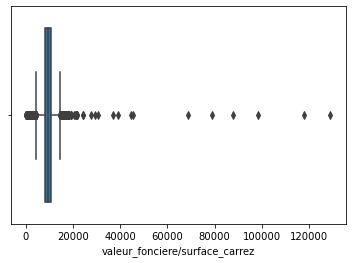

In [64]:
sns.boxplot(db_surface_carrez['valeur_fonciere/surface_carrez'])

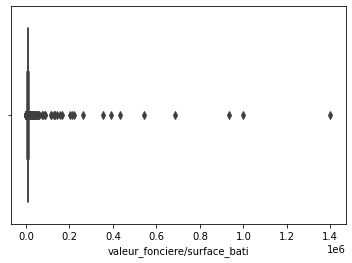

In [65]:
sns.boxplot(db_surface_bati['valeur_fonciere/surface_bati'])

In [66]:
# We define a function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


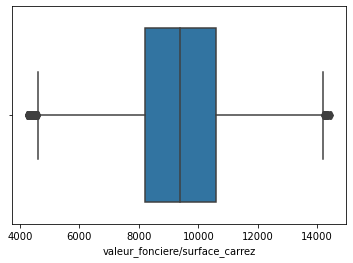

In [67]:
# We create a new table without outliers for carrez
db_surface_carrez_not_outliers=remove_outlier(db_surface_carrez, 'valeur_fonciere/surface_carrez')
sns.boxplot(db_surface_carrez_not_outliers['valeur_fonciere/surface_carrez'])

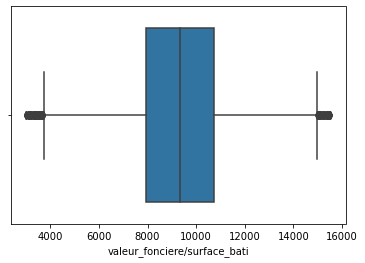

In [68]:
# We create a new table without outliers for carrez
db_surface_bati_not_outliers=remove_outlier(db_surface_bati, 'valeur_fonciere/surface_bati')
sns.boxplot(db_surface_bati_not_outliers['valeur_fonciere/surface_bati'])

# Export

In [69]:
#export command to get the CSV file for Flats transaction (GENERAL)
db_general.to_csv('Paries9e_General.csv', sep='/', index=False)

In [70]:
#export command to get the CSV file for Flats transaction (CARREZ)
db_surface_carrez.to_csv('Paris9e_Transactions_Surf-Carrez.csv', sep='/', index=False)

In [71]:
#export command to get the CSV file for Flats transaction (CARREZ_not_outliers)
db_surface_carrez_not_outliers.to_csv('Paris9e_Transactions_Carrez_not_outliers.csv', sep='/', index=False)

In [72]:
#export command to get the CSV file for Flats transaction (BATI)
db_surface_bati.to_csv('Paris9e_Transactions_Surf-Bati_with-outliers.csv', sep='/', index=False)

In [73]:
#export command to get the CSV file for Flats transaction (BATI_not_outliers)
db_surface_bati_not_outliers.to_csv('Paris9e_Transactions_Bati.csv', sep='/', index=False)

# Hypothesis Testing

In [74]:
db_hypothesis=db_general[(db_general['surface_carrez_total']!=0) & (db_general['surface_reelle_bati']!=0)]

In [75]:
from scipy.stats import ttest_ind

ttest_ind(db_hypothesis['surface_carrez_total'], db_hypothesis['surface_reelle_bati'])

Ttest_indResult(statistic=2.082491976426455, pvalue=0.0373202251174824)

Since pvalue is lower than 5%, we confirm that there is a difference and since statistics is above 0, we deduce that 'surface_carrez_total' has a higher surface than 'surface_reelle_bati'.

# Correlation

In [76]:
# We verify if there is a correlation between price and surface for bati
db_surface_bati_not_outliers[['valeur_fonciere','surface_reelle_bati']].corr()

,valeur_fonciere,surface_reelle_bati
valeur_fonciere,1.000000,0.939595
surface_reelle_bati,0.939595,1.000000


As we can see, the price is highly positively correlated with the surface. The more the price is high, the more the surface will be high.

In [77]:
# We verify if there is a correlation between price and surface for carrez
db_surface_carrez_not_outliers[['valeur_fonciere','surface_carrez_total']].corr()

,valeur_fonciere,surface_carrez_total
valeur_fonciere,1.000000,0.918182
surface_carrez_total,0.918182,1.000000


As we can see, the price is highly positively correlated with the surface.